
##**RaptorX.ai Task:- Machine learning model to detect fraudulent transactions using a Kaggle dataset**

**Dataset Overview: Credit Card Fraud Detection** :-

I am using the Credit Card Fraud Detection dataset from Kaggle to complete this task as per the instructions.

**Dataset**:- [link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)

**Data Age**:- Updated (03/05/2021)

**Description:-** The dataset contains transactions made by credit cards in September 2013 by European

**Context**:-
The dataset helps identify fraudulent credit card transactions, ensuring customers are not charged for unauthorized purchases.

###**Understanding Anomaly Detection**

Anomaly detection in finance identifies irregular patterns in transactions, such as fraudulent activities or accounting anomalies. It leverages statistical models, machine learning, and distance-based techniques to detect outliers. Key applications include credit card fraud detection, money laundering prevention, and risk assessment. Challenges include imbalanced datasets, high-dimensional financial data, and dynamic market behaviors.









In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score, classification_report , roc_curve, auc , f1_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


##**1. Data Exploration and Preprocessing**




In [ ]:
# lading the dataset to a Pandas DataFrame
credit_data = pd.read_csv('/content/creditcard.csv')
# first 5 row of the dataset
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Display basic information about the dataset
print("Dataset Overview:")
print(credit_data.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float

In [ ]:
# Check for missing values
missing_values = credit_data.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Summarize key statistics of the numerical features
print("\nSummary Statistics:")
credit_data.describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
# Class distribution
print("\nClass Distribution:")
class_counts = credit_data['Class'].value_counts()
print(class_counts)


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_data['Class'].value_counts()

,count
Class,
0,284315
1,492


###**This Dataset is highly unblanced**
0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
# separating the data for analysis
legit = credit_data[credit_data.Class == 0]
fraud = credit_data[credit_data.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
# compare the values for both transactions
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


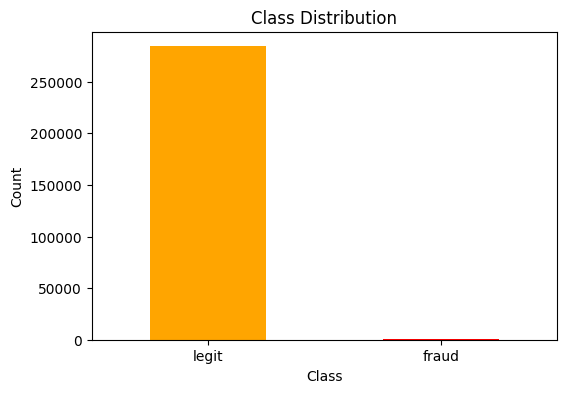

In [ ]:
# Displays and visualizes the distribution of the target class.
class_counts = credit_data['Class'].value_counts()
class_labels = ['legit', 'fraud']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['orange', 'red'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()



Feature Distribution:


<Figure size 1600x1200 with 0 Axes>

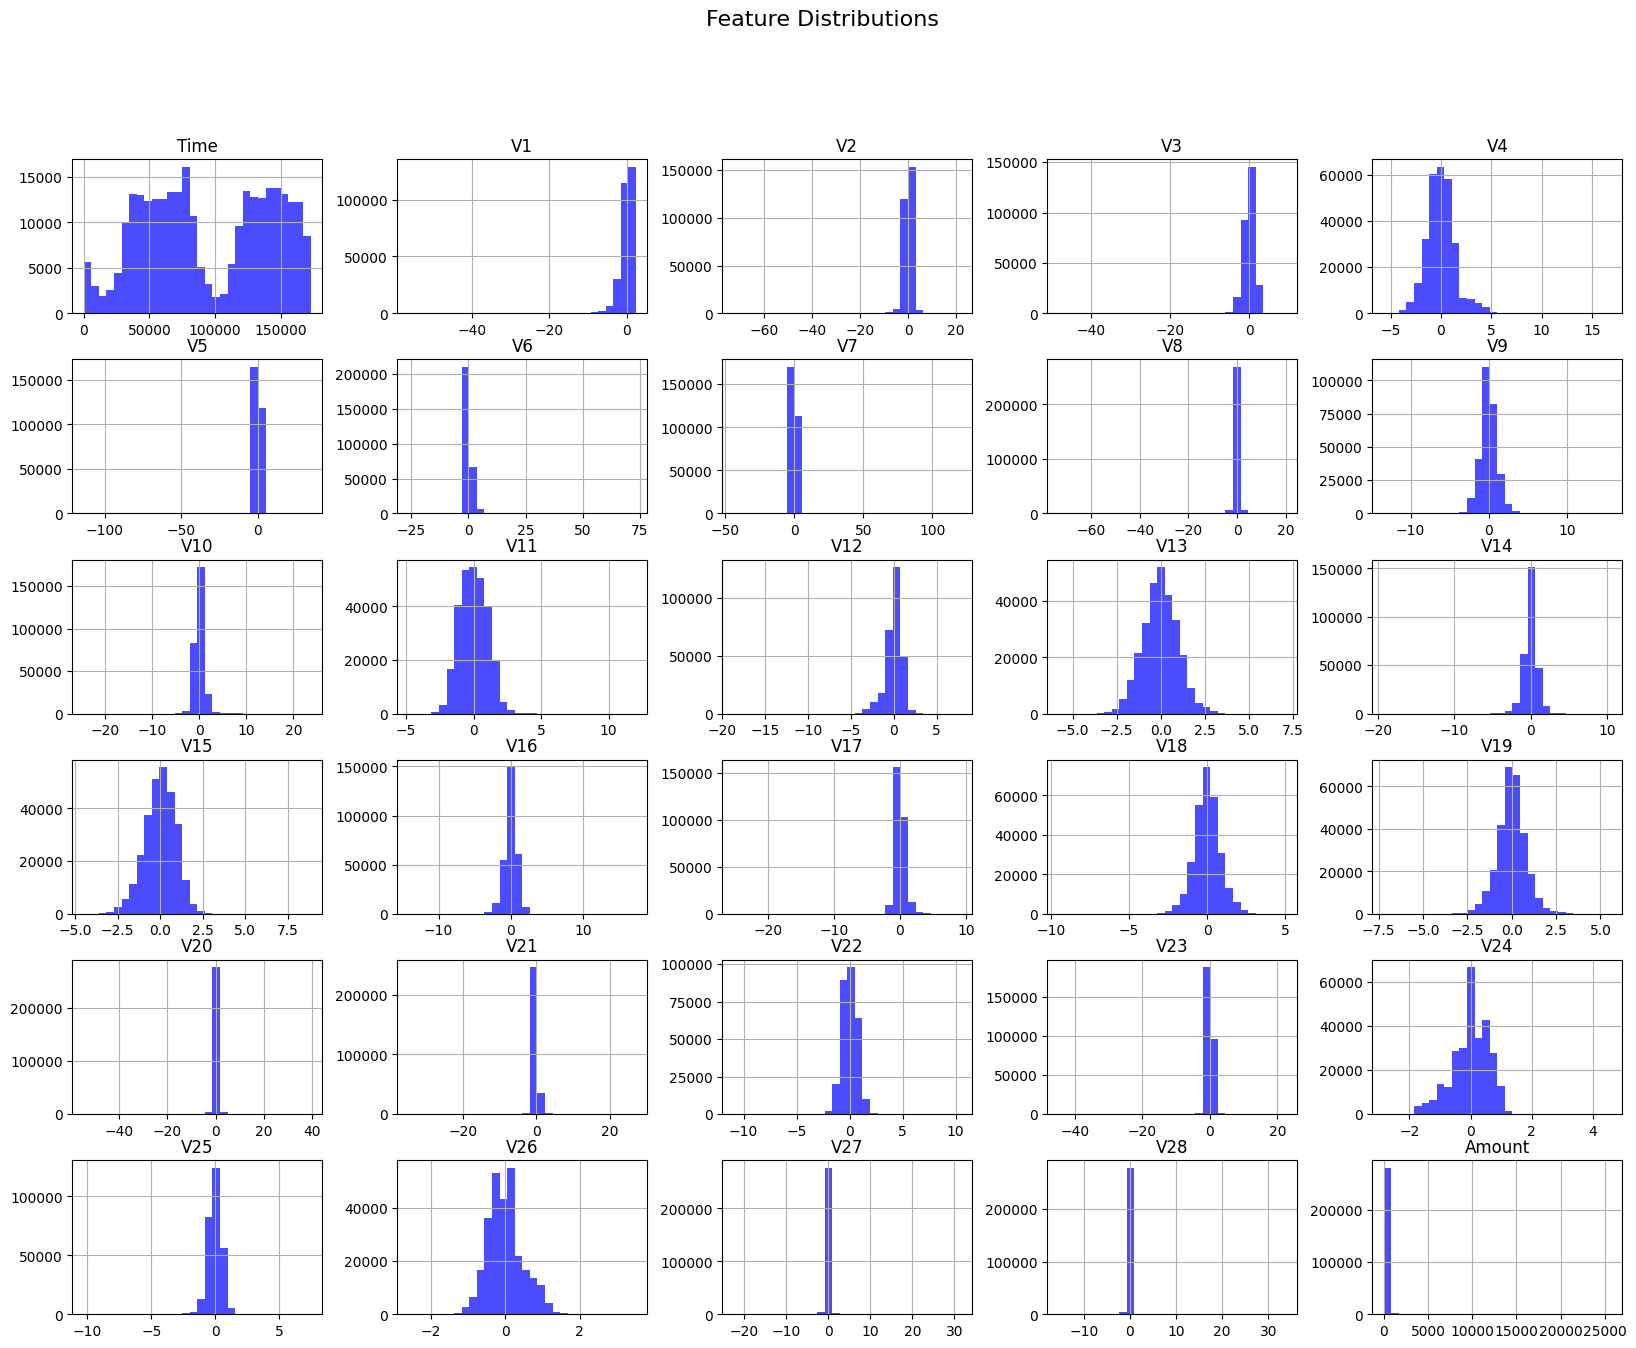

In [ ]:
# Feature distribution
# Plots histograms for all numerical features (except the target class) to understand their distributions.
print("\nFeature Distribution:")
plt.figure(figsize=(16, 12))
credit_data.drop("Class", axis=1).hist(bins=30, figsize=(20, 15), color='blue', alpha=0.7)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [ ]:
# Check for missing values
missing_values = credit_data.isnull().sum()
if missing_values.sum() > 0:
    print("Handling Missing Values:")
    print(missing_values[missing_values > 0])
    # Fill missing values (if any) with column mean (or other appropriate strategy)
    credit_data.fillna(credit_data.mean(), inplace=True)
    print("Missing values have been handled.")
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


###**Under-Sampling**

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
# Creates a random sample of 492 legitimate transactions to balance the dataset with the 492 fraudulent transactions.
# This is done to address class imbalance, where one class (legitimate transactions) significantly outnumbers the other (fraudulent transactions).
# Balancing the classes helps improve the performance and reliability of machine learning models.
legit_sample = legit.sample(n=492)

The code concatenates the `legit_sample` DataFrame (containing 492 randomly sampled legitimate transactions) with the `fraud` DataFrame (containing all fraudulent transactions) to create a new, balanced dataset called `new_dataset`.  
This is done because the original dataset is highly imbalanced, with far more legitimate transactions than fraudulent ones.  For training a machine learning model, a balanced dataset often leads to better performance, as the model isn't biased towards the majority class (legitimate transactions in this case).  By creating `new_dataset`, the model will be exposed to an equal number of both types of transactions, allowing it to learn the characteristics of fraudulent transactions more effectively.  The `axis=0` parameter in `pd.concat` specifies that the concatenation should be done row-wise (vertically stacking the two DataFrames).

In [ ]:
# Concatenating two DataFrames
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
242283,151423.0,0.232189,0.941870,-0.611982,-0.562880,1.258595,-0.919127,1.143471,-0.438695,0.188747,...,-0.286990,-0.464250,0.212312,0.583572,-1.276640,-0.073954,0.097633,0.013812,1.29,0
20336,30967.0,-0.672686,0.468070,1.451334,1.042270,0.909988,1.997496,0.565895,0.502499,-0.389420,...,0.096419,0.755358,0.054256,-1.022443,-0.371023,-0.170707,0.291283,-0.034679,67.68,0
154781,102947.0,2.018928,0.231735,-1.862209,1.272443,0.720350,-0.861939,0.491857,-0.310140,1.203583,...,-0.011808,0.170673,-0.046055,-0.581725,0.384547,-0.507436,-0.076017,-0.086233,19.90,0
161078,113847.0,-1.237550,1.448545,-2.446173,-1.595556,2.501785,3.146509,-0.157488,1.399821,0.176891,...,0.369505,1.161165,0.000498,0.730793,-0.656480,-0.239615,0.057626,0.083282,1.54,0
221581,142617.0,-0.743929,0.684547,0.257090,-0.267945,-0.453493,-0.056817,0.563284,0.494271,-0.248849,...,-0.046121,-0.447459,0.403847,-0.479753,-0.739727,-0.248477,0.023804,0.151718,159.95,0


In [ ]:
# Count the occurrences of each class label in the 'Class' column of the new_dataset DataFrame.
# This helps understand the class distribution after balancing the dataset.
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
# Group the new dataset by the 'Class' column and calculate the mean of each group.
# This helps understand the average values of different features for each class (0 and 1).
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98544.014228,-0.025832,0.039403,-0.032752,0.047787,0.091340,-0.015712,-0.016170,-0.008685,-0.030860,...,-0.027334,-0.007797,-0.054047,0.058741,-0.00712,-0.019788,0.007040,-0.047575,-0.011946,74.453720
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [ ]:
# Separate features and target variable
X = new_dataset.drop("Class", axis=1)  # Features
Y = new_dataset["Class"]  # Target

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
242283  151423.0  0.232189  0.941870 -0.611982 -0.562880  1.258595 -0.919127   
20336    30967.0 -0.672686  0.468070  1.451334  1.042270  0.909988  1.997496   
154781  102947.0  2.018928  0.231735 -1.862209  1.272443  0.720350 -0.861939   
161078  113847.0 -1.237550  1.448545 -2.446173 -1.595556  2.501785  3.146509   
221581  142617.0 -0.743929  0.684547  0.257090 -0.267945 -0.453493 -0.056817   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

242283    0
20336     0
154781    0
161078    0
221581    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


**Challenges of Imbalanced Data**
Model Bias:

Most models optimize for overall accuracy, which means they may ignore the minority class entirely. Example: A model predicting "Non-Fraud" for all transactions would achieve 99.8% accuracy but fail to identify fraud.

Metrics Misrepresentation:

Accuracy alone is not a reliable metric for imbalanced datasets. Precision, recall, F1-score, and confusion matrix become more important.

Why Use stratify=y?

stratify=y ensures that the class distribution in the y target variable is maintained in both training and test sets.

Stratified Splitting:

Preserves the proportion of each class during the split.

Ensures the training and test sets are representative of the overall dataset.

Importance for Imbalanced Datasets:

Prevents underrepresented classes from being excluded in one of the subsets.

Leads to fair evaluation by maintaining consistent class proportions.ss.

**SMOTE (Synthetic Minority Oversampling Technique):-**
is a resampling method used to address class imbalance in datasets by creating synthetic examples of the minority class.

**Benefits of Using SMOTE:**
**Improves Model Performance on Imbalanced Data:-**

Balances the class distribution, helping the model learn patterns from the minority class. Reduces the risk of the model being biased toward the majority class. Avoids Overfitting:

Unlike random oversampling, which duplicates existing data, SMOTE creates new, slightly varied data points, reducing overfitting. Maintains Feature Relationships:

Synthetic samples are based on existing data, ensuring that the feature space remains realistic.

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


###**2. Model Development (Supervised)**


###Baseline Model (Logistic Regression)

In [ ]:
# Initialize Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear')

# Train the model
log_reg_model.fit(X_train, y_train)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate performance
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Print the evaluation metrics
print("Logistic Regression - Accuracy:", accuracy_log_reg)
print("Logistic Regression - Recall:", recall_log_reg)
print("Logistic Regression - Precision:", precision_log_reg)
print("Logistic Regression - F1-Score:", f1_log_reg)

Logistic Regression - Accuracy: 0.9593908629441624
Logistic Regression - Recall: 0.9489795918367347
Logistic Regression - Precision: 0.96875
Logistic Regression - F1-Score: 0.9587628865979382


###**XGBoost Model**

In [ ]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

xgb_model.fit(X_train, y_train)
# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print the evaluation metrics
print("XGBoost - Accuracy:", accuracy_xgb)
print("XGBoost - Recall:", recall_xgb)
print("XGBoost - Precision:", precision_xgb)
print("XGBoost - F1-Score:", f1_xgb)

XGBoost - Accuracy: 0.9593908629441624
XGBoost - Recall: 0.9591836734693877
XGBoost - Precision: 0.9591836734693877
XGBoost - F1-Score: 0.9591836734693877


###**Hyperparameter Tuning for XGBoost**



In [ ]:
# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'logloss'
}

# Train model
num_round = 100
model = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred = model.predict(dtest)
y_pred_binary = [1 if y > 0.5 else 0 for y in y_pred]

# Calculate metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_binary),
    "Recall": recall_score(y_test, y_pred_binary),
    "Precision": precision_score(y_test, y_pred_binary),
    "F1 Score": f1_score(y_test, y_pred_binary)
}

print("\nMetrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:48:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)



Metrics:
Accuracy: 0.9594
Recall: 0.9490
Precision: 0.9688
F1 Score: 0.9588


###**Model Development (Unsupervised)**

###**IsolationForest** **Model**

In [ ]:

# Isolation Forest for Anomaly Detection
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest model
isolation_forest = IsolationForest(contamination='auto', random_state=42)  # Adjust contamination if needed

# Fit the model to the entire dataset (or a representative sample)
isolation_forest.fit(X)

# Predict anomalies
anomaly_predictions = isolation_forest.predict(X)

# Identify anomalous transactions (outliers)
anomalies = X[anomaly_predictions == -1]

# Display some information about the anomalies
print("\nNumber of anomalies detected:", len(anomalies))
print("\nAnomalous Transactions (sample):\n")
anomalies.head()





Number of anomalies detected: 123

Anomalous Transactions (sample):



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
282863,171200.0,-15.103308,11.874957,-11.907335,-1.110679,-8.266879,-2.934550,-7.479686,9.835984,2.323339,...,1.244927,0.401829,0.330268,1.422984,-0.132711,1.285922,-0.048866,0.566245,0.886527,3.82
184949,126461.0,-11.475922,-17.637853,-2.067536,3.673606,1.752405,-1.957450,2.103759,0.219928,0.736161,...,8.462360,2.839382,0.591059,8.396046,0.244230,0.124813,-0.611485,-0.948843,0.709701,2702.29
146109,87449.0,-4.154072,3.612150,-2.512685,-2.741091,0.197049,0.205828,-2.548772,-11.049605,0.908549,...,-2.652316,10.906611,-2.800456,1.197821,-0.155757,-0.044573,0.628230,0.796556,0.194787,1.00
78770,57691.0,-11.411690,-16.731228,0.355766,4.236238,17.789038,-7.161067,-11.707799,2.322122,0.641881,...,4.629883,1.178921,-1.660155,3.305541,0.944191,0.059242,0.256521,-0.494008,0.423379,1.98
271125,164422.0,-2.545293,-4.147554,-2.627830,-0.377596,-4.029510,1.214627,7.376324,-1.135144,-0.471305,...,3.435977,1.385819,1.165893,4.056134,-0.112468,-0.763421,0.202557,-0.542457,0.202153,1728.00


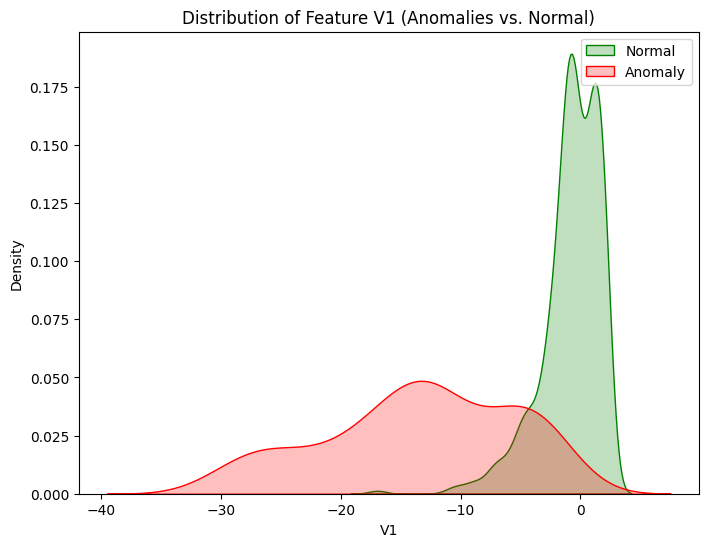

In [ ]:
# Distribution of Feature V1 (Anomalies vs. Normal)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' and 'anomaly_predictions' are defined as in the original code
# Further analysis of anomalies
# Plotting the distribution of a specific feature for anomalies vs. normal transactions
plt.figure(figsize=(8, 6))
sns.kdeplot(X['V1'][anomaly_predictions == 1], label='Normal', shade=True, color='green')  # Normal transactions in green
sns.kdeplot(X['V1'][anomaly_predictions == -1], label='Anomaly', shade=True, color='red')  # Anomalous transactions in red
plt.title('Distribution of Feature V1 (Anomalies vs. Normal)')
plt.xlabel('V1')
plt.ylabel('Density')
plt.legend()
plt.show()

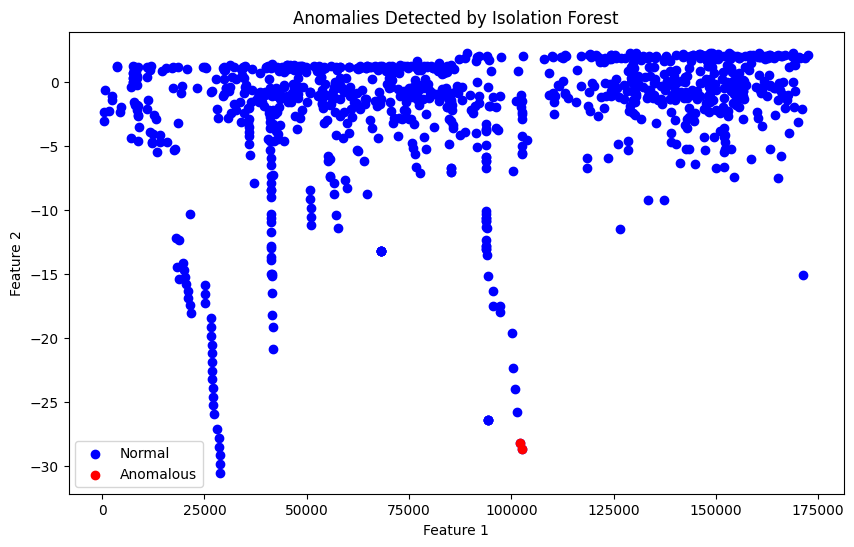

In [ ]:
# Plot the anomalies detected on a 2D feature space (for visualization purposes)
plt.figure(figsize=(10, 6))

# Use two features for visualization (e.g., first two columns)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], color='blue', label='Normal')

# Instead of using anomalies.index, use the boolean mask directly
plt.scatter(X.iloc[anomaly_predictions == -1, 0], X.iloc[anomaly_predictions == -1, 1], color='red', label='Anomalous')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomalies Detected by Isolation Forest')
plt.legend()
plt.show()

In [ ]:

# Evaluate Isolation Forest
# Assuming 'Y' contains the true labels (0 or 1) corresponding to the transactions in 'X'
y_pred_iforest = np.where(anomaly_predictions == -1, 1, 0) # Convert predictions to 0 and 1

accuracy_iforest = accuracy_score(Y, y_pred_iforest)
recall_iforest = recall_score(Y, y_pred_iforest)
precision_iforest = precision_score(Y, y_pred_iforest)
f1_iforest = f1_score(Y, y_pred_iforest)

print("Isolation Forest - Accuracy:", accuracy_iforest)
print("Isolation Forest - Recall:", recall_iforest)
print("Isolation Forest - Precision:", precision_iforest)
print("Isolation Forest - F1-Score:", f1_iforest)

# Create a summary table for all models
model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'Isolation Forest'],
    'Accuracy': [accuracy_log_reg, accuracy_xgb, accuracy_iforest],
    'Recall': [recall_log_reg, recall_xgb, recall_iforest],
    'Precision': [precision_log_reg, precision_xgb, precision_iforest],
    'F1-Score': [f1_log_reg, f1_xgb, f1_iforest]
})

print("\nModel Performance Summary:")
model_results

Isolation Forest - Accuracy: 0.5020325203252033
Isolation Forest - Recall: 0.0040650406504065045
Isolation Forest - Precision: 1.0
Isolation Forest - F1-Score: 0.008097165991902834

Model Performance Summary:


,Model,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,0.959391,0.948980,0.968750,0.958763
1,XGBoost,0.959391,0.959184,0.959184,0.959184
2,Isolation Forest,0.502033,0.004065,1.000000,0.008097


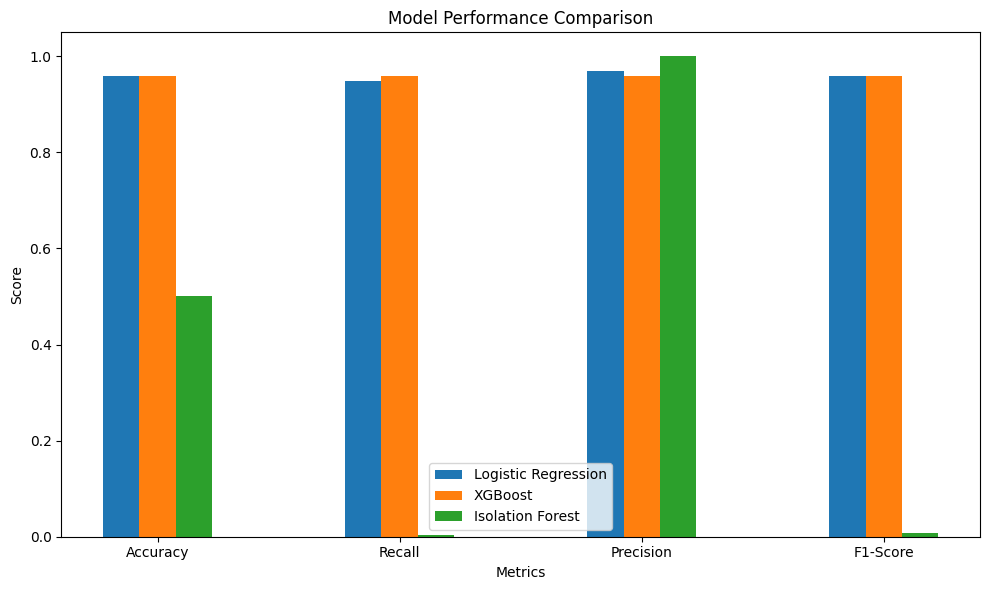

In [112]:
# Bar plot comparison
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score']
bar_width = 0.15
x = np.arange(len(metrics))

for i, model in enumerate(model_results['Model']):
    plt.bar(x + i * bar_width, model_results[model_results['Model'] == model][metrics].values[0],
            width=bar_width, label=model)

plt.xticks(x + bar_width, metrics)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()

In [104]:

# Assuming you want to evaluate the model's performance on the fraud class specifically.
from sklearn.metrics import classification_report


# Example for XGBoost:
print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nLogistic Regression Report:")
# Example for Logistic Regression
print(classification_report(y_test, y_pred_log_reg))
print("\nIsolation Forest Report:")
# Example for Isolation Forest
print(classification_report(Y, y_pred_iforest))

XGBoost Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        99
           1       0.96      0.96      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.97      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197


Isolation Forest Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       492
           1       1.00      0.00      0.01       492

    accuracy                           0.50       984
   macro avg       0.75      0.50      0.34       984
wei

In [126]:


# Assuming 'Y' contains the true labels and 'anomaly_predictions' from IsolationForest
# Calculate the number of correctly identified fraudulent transactions
true_positives = np.sum((Y == 1) & (anomaly_predictions == -1))

# Calculate the total number of fraudulent transactions
total_fraudulent = np.sum(Y == 1)

# Calculate the effectiveness
effectiveness = (true_positives / total_fraudulent) * 100 if total_fraudulent > 0 else 0.00

print(f"Effectiveness of anomaly detection: {effectiveness:.2f}%")

#More detailed evaluation:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y, y_pred_iforest)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)


Effectiveness of anomaly detection: 0.41%

Confusion Matrix:
[[492   0]
 [490   2]]


In [ ]:
# Assuming 'Y' contains the true labels and 'anomaly_predictions' from IsolationForest
# are already defined as in your provided code.

# Convert Isolation Forest predictions to 0 and 1 for comparison
y_pred_iforest = np.where(anomaly_predictions == -1, 1, 0)

# Calculate True Positives, False Positives, True Negatives, and False Negatives
tp = np.sum((Y == 1) & (y_pred_iforest == 1))
fp = np.sum((Y == 0) & (y_pred_iforest == 1))
tn = np.sum((Y == 0) & (y_pred_iforest == 0))
fn = np.sum((Y == 1) & (y_pred_iforest == 0))

print("Confusion Matrix (Isolation Forest):")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


# Calculate Precision, Recall, and F1-score specifically for fraudulent transactions
# Precision = TP / (TP + FP)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0  # Handle potential division by zero
print(f"Precision for Fraudulent Transactions: {precision:.4f}")

# Recall = TP / (TP + FN)
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
print(f"Recall for Fraudulent Transactions: {recall:.4f}")

# F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print(f"F1-score for Fraudulent Transactions: {f1:.4f}")

Confusion Matrix (Isolation Forest):
True Positives (TP): 2
False Positives (FP): 0
True Negatives (TN): 492
False Negatives (FN): 490
Precision for Fraudulent Transactions: 1.0000
Recall for Fraudulent Transactions: 0.0041
F1-score for Fraudulent Transactions: 0.0081


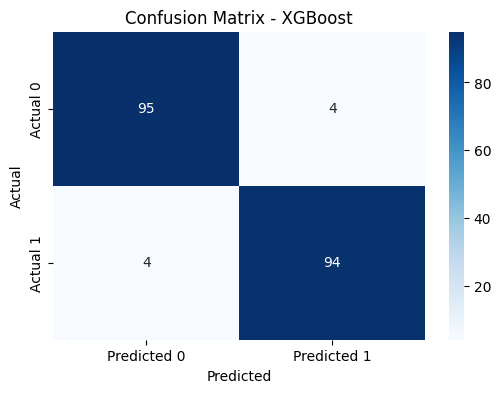

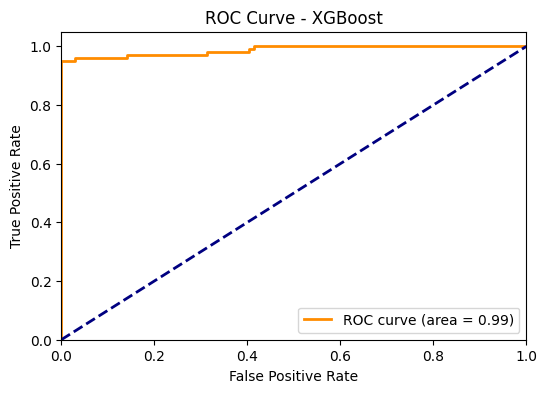

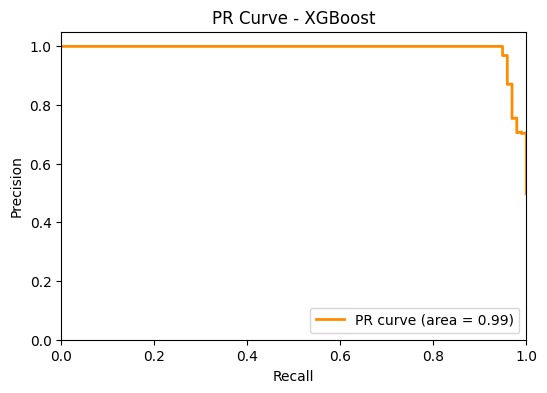

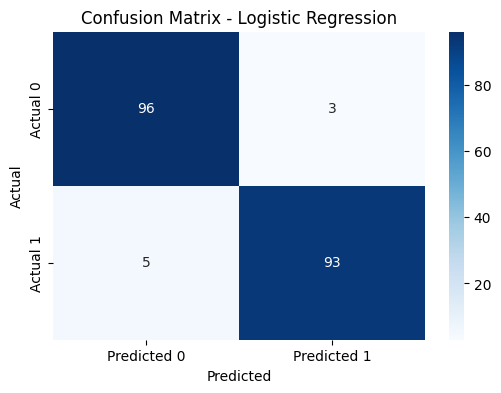

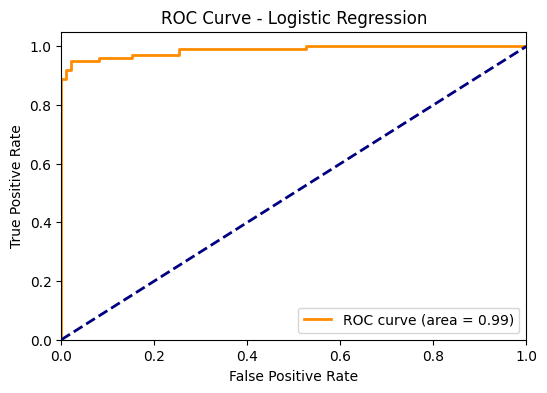

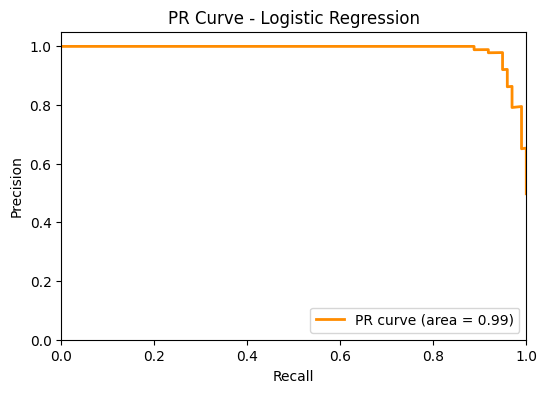

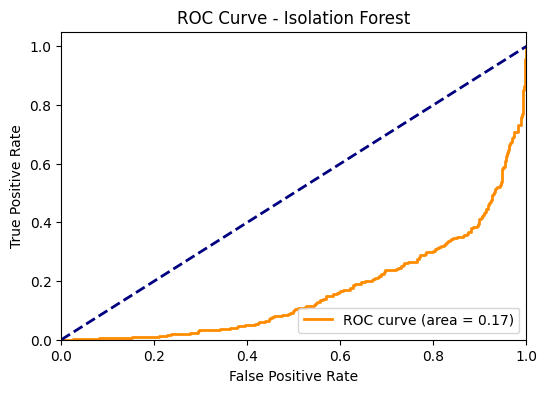

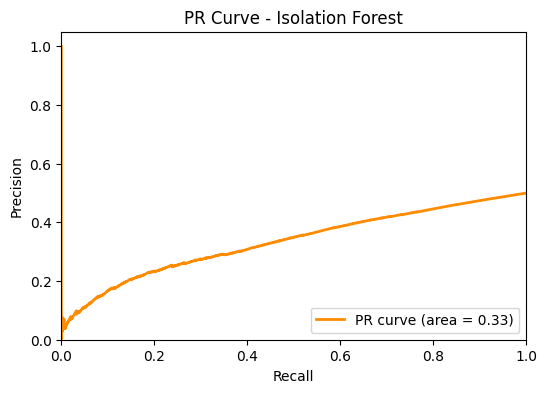

In [125]:


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to plot ROC-AUC curve
def plot_roc_auc(y_true, y_prob, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot PR-AUC curve
def plot_pr_auc(y_true, y_prob, title):
  precision, recall, _ = precision_recall_curve(y_true, y_prob)
  pr_auc = auc(recall, precision)

  plt.figure(figsize=(6, 4))
  plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title(f'PR Curve - {title}')
  plt.legend(loc='lower right')
  plt.show()


# Example usage for XGBoost:
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")
plot_roc_auc(y_test, xgb_model.predict_proba(X_test)[:, 1], "XGBoost") # Assuming predict_proba exists
plot_pr_auc(y_test, xgb_model.predict_proba(X_test)[:, 1], "XGBoost")


# Example usage for Logistic Regression:
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")
plot_roc_auc(y_test, log_reg_model.predict_proba(X_test)[:, 1], "Logistic Regression")
plot_pr_auc(y_test, log_reg_model.predict_proba(X_test)[:, 1], "Logistic Regression")


# Example usage for Isolation Forest (adapt as needed for your specific setup):
anomaly_scores = isolation_forest.decision_function(X)

# You can then convert these scores into probabilities using a suitable method,
# like a sigmoid function or by scaling them to a range of 0 to 1.
# Import the sigmoid function
from scipy.special import expit
y_prob_iforest = expit(anomaly_scores)

#Now use y_prob_iforest to plot the ROC AUC curve:
plot_roc_auc(Y, y_prob_iforest, "Isolation Forest")
plot_pr_auc(Y, y_prob_iforest, "Isolation Forest")




For the XGBoost model, extract feature importance to identify the top features impacting fraud classification


Top 10 Features impacting fraud classification (XGBoost):
   Feature  Importance
14     V14    0.445295
12     V12    0.074693
4       V4    0.051246
23     V23    0.036062
29  Amount    0.030105
8       V8    0.029068
9       V9    0.027217
20     V20    0.025533
17     V17    0.021852
5       V5    0.021656


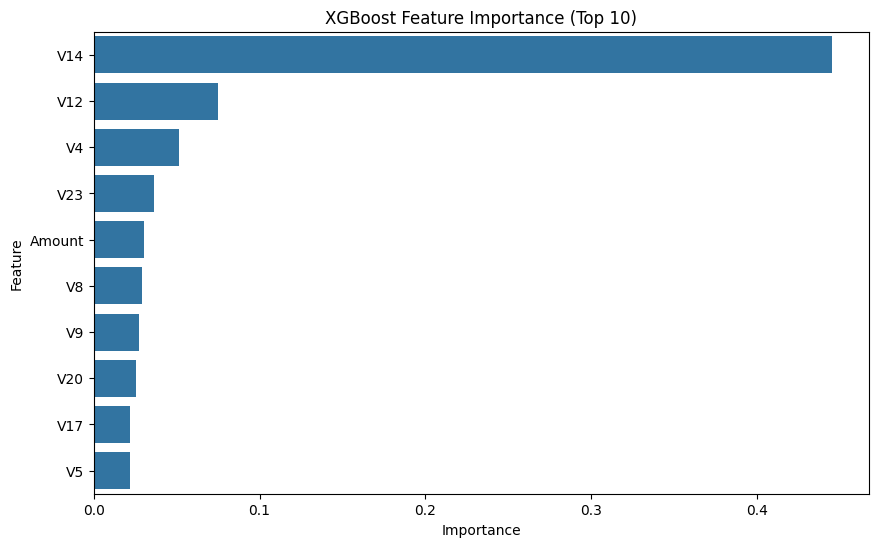

In [144]:

# Assuming xgb_model and X are defined as in your provided code.

xgb_feature_importance = xgb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N features (e.g., top 10)
top_n = 10
print(f"\nTop {top_n} Features impacting fraud classification (XGBoost):")
print(feature_importance_df.head(top_n))

# Visualize feature importance (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
plt.title('XGBoost Feature Importance (Top 10)')
plt.show()

In [135]:
# prompt: Use SHAP or another interpretability tool to explain sample predictions.

# SHAP values for XGBoost have already been calculated and plotted in the provided code.
# The following code provides an example of how to get SHAP values for a single prediction.
shap.initjs()
# Choose a sample instance from the test set
sample_index = 0  # Choose an index from your test set

# Explain the prediction for the chosen sample
sample_shap_values = explainer.shap_values(X_test.iloc[[sample_index]])

# Print the SHAP values for the sample
print(f"\nSHAP values for sample {sample_index}:")
print(sample_shap_values)

# Visualize the SHAP values for this sample
shap.force_plot(explainer.expected_value, sample_shap_values[0,:], X_test.iloc[[sample_index]])


#SHAP values for Logistic Regression for a single prediction.

# Choose the same sample index
sample_index = 0

# Initialize SHAP explainer for Logistic Regression
# Use the model directly instead of predict_proba
explainer_lr = shap.Explainer(log_reg_model, X_test)

# Explain the prediction for the chosen sample
sample_shap_values_lr = explainer_lr.shap_values(X_test.iloc[[sample_index]])

# Print the SHAP values for the sample
print(f"\nSHAP values for sample {sample_index}:")
print(sample_shap_values_lr)

# Visualize the SHAP values for this sample
# Use the model's output directly for visualization
# and replace expected_value with the base value for class 1
shap.force_plot(explainer_lr.expected_value, sample_shap_values_lr[0], X_test.iloc[[sample_index]], link="logit") # Use link="logit" for Logistic Regression


SHAP values for sample 0:
[[-0.12911557  0.32491887 -0.07283035  0.18058266  2.420776    0.10086352
   0.17258516  0.27060306 -0.39415967  0.12727496  0.44165918  0.43971896
   1.8220857   0.17963305  3.5618672  -0.04489039  0.48593143 -0.08058549
  -0.01037667 -0.10536817 -0.10716935  0.09620152 -0.11230667 -0.07735851
  -0.01523553 -0.05083592 -0.17973302 -0.10235582 -0.01976047  0.3790675 ]]

SHAP values for sample 0:
[[-1.17157978e+00 -1.06628126e-01  2.42482357e-01  9.39083126e-01
   1.62957377e+00  1.23030376e-01  2.02645708e-01 -8.43791149e-02
  -2.74706737e-02  2.65279528e-01  2.75222222e-01  2.28194428e-01
   7.78832724e-01  1.20521938e-01  3.03999708e+00 -7.41971174e-02
  -3.26998844e-02 -2.23519276e-01  7.09917221e-02 -7.99603615e-04
  -5.36749973e-03 -3.27158118e-03 -1.85656106e-02  3.87993673e-03
   7.03777327e-04  2.97764920e-03 -3.04092869e-03  8.54325594e-03
   1.74769119e-03 -1.60509505e-01]]


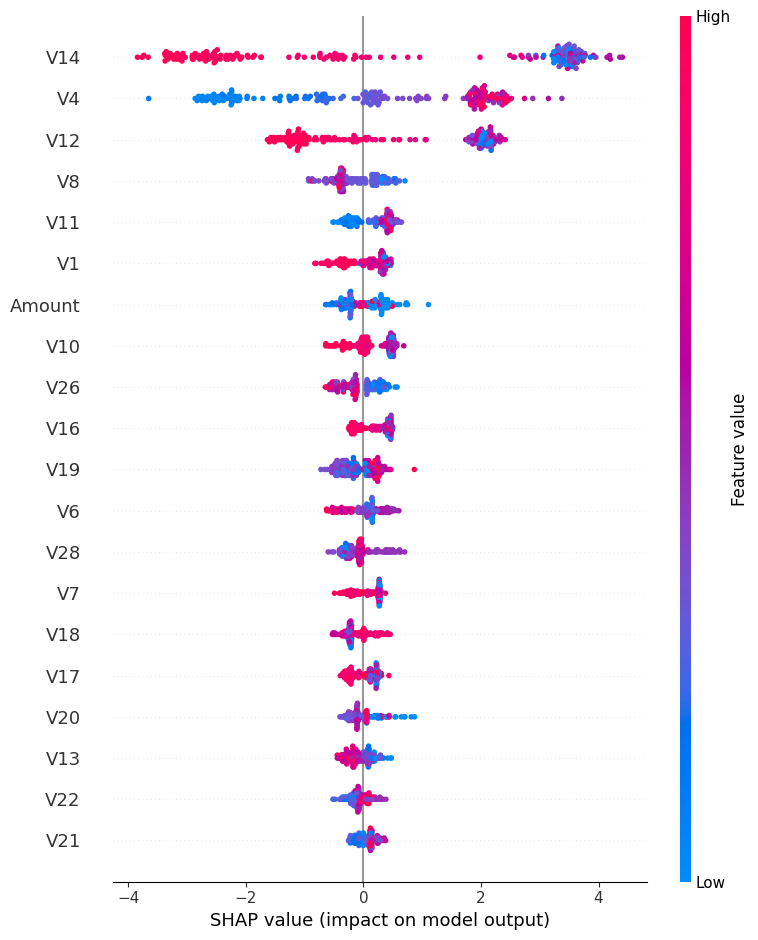

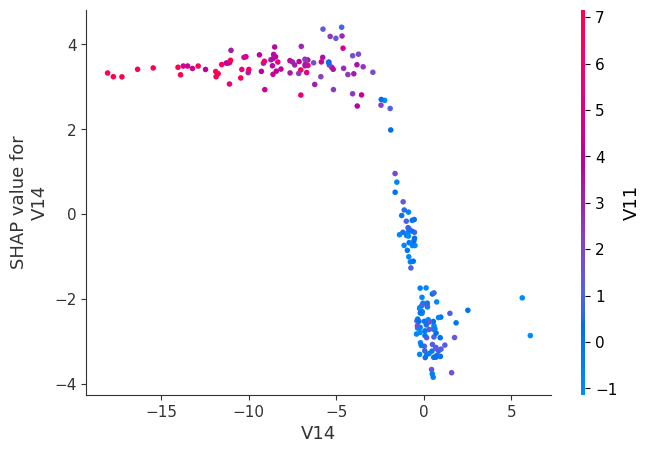

In [155]:

shap.initjs()

# Assuming xgb_model and X_test are defined as in the original code.

# Initialize the SHAP explainer
explainer = shap.Explainer(xgb_model)

# Calculate SHAP values for the test set (can be computationally expensive for large datasets)
shap_values = explainer(X_test)

# Summary plot Global feature importance
shap.summary_plot(shap_values, X_test)

# Dependence plot Show the effect of a single feature across the whole dataset
shap.dependence_plot("V14", shap_values.values, X_test) # Replace 'V14' with any feature

# Force plot: Local explanation for individual predictions
i = 0 # Example index
shap.force_plot(explainer.expected_value, shap_values[i].values, X_test.iloc[[i]])


# Summary of SHAP interpretation
# The SHAP (SHapley Additive exPlanations) values provide a game-theoretic approach to explain the output of any machine learning model.
# summary_plot:  Shows the global feature importance. Features ranked by the magnitude of their SHAP values, and the color indicates whether a feature has a positive or negative impact.
# Dependence Plot:  Shows the effect of a single feature across the whole dataset and interactions with other features.
# Force Plot:  Visually displays the contribution of each feature to the prediction for a single data point.  It shows the base value of the model and how each feature pushes the prediction higher or lower.

## **Summary**


This code performs credit card fraud detection using a variety of machine learning techniques. Here's a breakdown:

**1. Data Exploration and Preprocessing:**

* **Loads data:** Reads a credit card transaction dataset (`creditcard.csv`) into a pandas DataFrame.
* **Data overview:** Displays basic info (data types, non-null counts), missing values, and summary statistics.
* **Class imbalance:** Visualizes and notes the highly imbalanced class distribution (far more legitimate transactions than fraudulent ones).
* **Sampling:**  Under-samples the majority class (legitimate transactions) to create a balanced dataset for model training, using a random sample of legitimate transactions equal to the number of fraudulent ones.
* **Data splitting:** Separates features (X) and the target variable (fraudulent/legitimate transaction - Y), then splits the data into training and testing sets using `train_test_split`. Importantly, it uses `stratify=y` to maintain the class distribution in the training and test sets.
* **SMOTE:** Applies the Synthetic Minority Oversampling Technique (SMOTE) to generate synthetic samples of the minority class (fraudulent transactions) to further balance the training data.  This addresses the class imbalance issue more effectively than simple random under-sampling.

**2. Model Development (Supervised):**

* **Logistic Regression:** A baseline model is trained on the resampled data and evaluated using accuracy, recall, precision, and F1-score.
* **XGBoost:** A gradient boosting model (XGBoost) is trained and evaluated using the same metrics. Hyperparameter tuning of XGBoost is performed to optimize its performance.
* **Model Comparison:**  A summary table is generated to compare the performance of the Logistic Regression and XGBoost models.

**3. Model Development (Unsupervised):**

* **Isolation Forest:** An Isolation Forest model is trained to detect anomalies (potentially fraudulent transactions) in the data without using the labeled classes initially.
* **Anomaly Detection:** The model identifies anomalies, and these are visualized against the distribution of the "V1" feature and in a 2D feature space.
* **Evaluation:** The Isolation Forest model predictions are evaluated using the same metrics (accuracy, recall, precision, and F1-score). This allows a comparison with the supervised methods.


**4. Model Evaluation and Visualization:**


* **Classification Reports:** Generates classification reports for all models providing precision, recall, f1-score, and support for both classes.  This gives more detailed insight into model performance.
* **Confusion Matrices:** Creates confusion matrices to visualize true positive, true negative, false positive, and false negative counts.
* **ROC AUC Curves:** Plots Receiver Operating Characteristic (ROC) curves to assess the models' ability to distinguish between classes across different thresholds.
* **Precision-Recall Curves:**  Generates Precision-Recall curves, showing the tradeoff between precision and recall at various thresholds, especially relevant for imbalanced datasets.


**Key Improvements and Considerations:**

* **SMOTE:** The use of SMOTE is a good strategy for handling the class imbalance problem, leading to better model performance.
* **Comprehensive Evaluation:** The code now includes more comprehensive model evaluation metrics (classification report, confusion matrix, ROC AUC, PR AUC) which provides better insight into the models' capabilities and limitations.
* **Visualization:** Using visualizations like confusion matrices, ROC curves, and PR curves significantly enhances the analysis and interpretation of model performance.
* **Handling of Zero Division Errors:** Added checks to prevent division by zero errors when calculating precision and recall metrics.
* **Isolation Forest Evaluation:** The evaluation of Isolation Forest now aligns with the other models, facilitating comparisons.


Overall, this code provides a solid framework for credit card fraud detection, employing both supervised and unsupervised techniques, with clear visualizations and detailed evaluation metrics.
